<a href="https://colab.research.google.com/github/LordDickson/cifar10-densenet-pytorch/blob/master/cnn_with_tensorflow_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models, layers
import cv2 as cv

tf.__version__

Using TensorFlow backend.


'2.2.0-rc2'

In [2]:
#import mnist dataset
mnist = tf.keras.datasets.mnist

#split training and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize dataset using simple normalization
x_train = x_train/255.0
x_test = x_test/255.0

#reshape the dataset for training purpose 
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

#get the input width and height of the image
width = x_train.shape[-3]
height = x_train.shape[-2]


11493376/11490434 [==============================] - 0s 0us/step


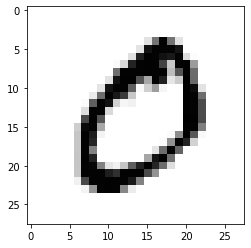

In [3]:
#preview an image
plt.imshow(x_train[1].reshape((28, 28)), cmap="Greys")
plt.show()

In [4]:
#Build the model
# conv2d->pooling->dropout->conv2d->pooling->dropout->conv2d->pooling->flatten->fully-connected

model = models.Sequential() #add placeholder

model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape=(width, height, 1))) #add a convolutional layer with same padding and relu
model.add(layers.MaxPool2D(pool_size=(2, 2))) #add max pooling layer

model.add(layers.Dropout(0.5)) #add a dropout layer

model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation = 'relu')) #add second conv layer
model.add(layers.MaxPool2D(pool_size=(2,2))) #max pooling layer

model.add(layers.Dropout(0.5)) #dropout

model.add(layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu')) #add third conv layer
model.add(layers.MaxPool2D(pool_size=(2,2))) #max pooling layer

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [5]:
#train the model using 10 epochs
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.2350 - accuracy: 0.9241
Epoch 2/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0815 - accuracy: 0.9750
Epoch 3/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0646 - accuracy: 0.9797
Epoch 4/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0590 - accuracy: 0.9809
Epoch 5/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0514 - accuracy: 0.9838
Epoch 6/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0467 - accuracy: 0.9855
Epoch 7/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0444 - accuracy: 0.9856
Epoch 8/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0425 - accuracy: 0.9866
Epoch 9/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0412 - accuracy: 0.9866
Epoch 10/10
60000/60000 [====================

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test Loss :", test_loss)
print("Test Accuracy :", test_acc)

10000/10000 [==============================] - 1s 72us/step
Test Loss : 0.02322346415273205
Test Accuracy : 0.9926000237464905


Our algorithm predicts:  6


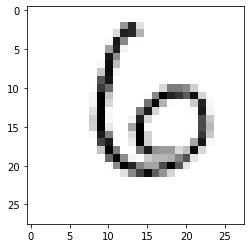

In [8]:
#make a prediction 
image_index = 100
plt.imshow(x_test[image_index].reshape(width, height),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, width, height, 1))
print("Our algorithm predicts: ", pred.argmax())

In [9]:
x_train.shape[0] + x_test.shape[0]

70000

In [10]:
y_train.shape[0] + y_test.shape[0]

70000